### Lab Tasks
- In the dataframe created in Lab 2 - Part a, set ``Salary`` as the target value. 
- The rest of the columns are considered as X, feature set. 
- Use ``train_test_split`` to split the dataset into train and test dataset. set ``random_state = 0``.
- Use ``MinMaxScaler`` to scale X_train and X_test. 

### Data preprocessing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('adult.csv')

In [6]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data = data[data != ' ?']
l = ['workclass', 'education', 'occupation', 'native-country']
data.drop(l, axis = 1, inplace = True)

C:\Users\saira\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [8]:
df = pd.get_dummies(data['marital-status'])
data = pd.concat([data, df], axis = 1)
data.drop('marital-status', axis = 1, inplace=True)

In [9]:
df = pd.get_dummies(data['relationship'])
data = pd.concat([data, df], axis = 1)
data.drop('relationship', axis = 1, inplace=True)

In [10]:
df = pd.get_dummies(data['race'])
data = pd.concat([data, df], axis = 1)
data.drop('race', axis = 1, inplace=True)

In [11]:
data['sex'] = data['sex'].map({' Male':0, ' Female':1})

In [12]:
data['Salary'] = data['Salary'].map({' <=50K':0, ' >50K':1})

In [13]:
y = data['Salary']
X = data.drop(['Salary'], axis = 1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [15]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### Question 1
Train a ``KNeighborClassifier`` on this dataset. Which value of the hyper parameter ``n_neighbors`` results in an overfitting problem. 

``neighbors = [1, 5, 10, 15, 20]``

In [16]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in [1, 5, 10, 15, 20]:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

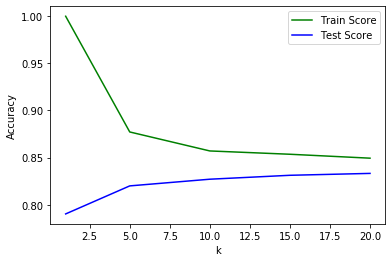

In [17]:
x_axis = [1, 5, 10, 15, 20]
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [18]:
#k -1 results in overfitting

knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9994
Test score: 0.7904


In [19]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8771
Test score: 0.8201


In [20]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8570
Test score: 0.8271


In [21]:
knn = KNeighborsClassifier(20)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8494
Test score: 0.8333


#### Question 2
Train a ``LinearSVC`` model on this dataset. Fine tune this model by changing the hyperparameter ``C`` in ``[0.01, 0.1, 1, 10]``. What can we say about this model. (set ``random_state = 0``)

In [40]:
#SVC
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)


print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.84
Accuracy on test set: 0.84


In [41]:
svc = SVC(C=0.01,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.801
Accuracy on test set: 0.801


In [42]:
svc = SVC(C=0.1,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.832
Accuracy on test set: 0.834


In [43]:
svc = SVC(C=10,kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.843
Accuracy on test set: 0.847


#### Question 3
Consider ``Xt = X_train[['age','education-num']][:100]``, and ``yt = y_train[:100]``. We have the following plots to show decision boundary of ``SVC(kernel = 'rbf')``. Which plot suggest the largest value of C and gamma? 
``C`` and ``gamma`` in ``[0.1, 1, 10]``. ``random_state = 0``

In [44]:
temp1 = pd.DataFrame(X_train, columns = ['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', ' Divorced', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Husband', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'])
temp2 = pd.DataFrame(y_train)

In [45]:
Xt = temp1[['age','education-num']][:100].values
yt = temp2[:100].values
X_train, X_test, y_train, y_test = train_test_split(Xt, yt, random_state = 0)

In [46]:
yt = yt.reshape(1,-1)
yt = yt.flatten()

In [47]:
from sklearn.svm import SVC

clf1 = SVC(kernel='rbf',gamma=0.1, C=0.1)
#clf2 = SVC(kernel='rbf',gamma=0.1, C=1)
#clf3 = SVC(kernel='rbf', gamma=0.1, C=10)
#clf4 = SVC(kernel='rbf', gamma=1, C=0.1)
clf5 = SVC(kernel='rbf', gamma=1, C=1)
#clf6 = SVC(kernel='rbf', degree=1, C=10)
#clf7 = SVC(kernel='rbf', gamma=10, C=0.1)
#clf8 = SVC(kernel='rbf', degree=10, C=1)
clf9 = SVC(kernel='rbf', gamma=10, C=10)

In [48]:
def make_meshgrid(x, y, h=.02):
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

C:\Users\saira\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)
C:\Users\saira\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


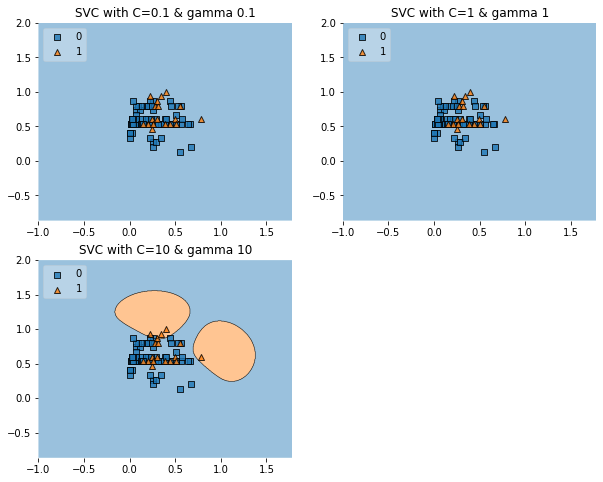

In [49]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['SVC with C=0.1 & gamma 0.1',
          'SVC with C=1 & gamma 1',
          'SVC with C=10 & gamma 10']

for clf, lab, grd in zip([clf1, clf5, clf9],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(Xt, yt)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=Xt, y=yt,
                                clf=clf, legend=2)
    plt.title(lab)

#### Question 4
Train a ``LogisticRegression`` model. Among values ``C`` in ``[0.1, 1, 10]`` and ``penalty`` in ``['l1', 'l2']``, which combination will give the best fit? (set ``random_state = 0``)

In [22]:
#Logistic Regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [23]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [24]:
X.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Divorced,Married-AF-spouse,Married-civ-spouse,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,77516,13,0,2174,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,13,0,0,0,13,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,0,0,40,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,7,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [25]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Salary, Length: 32561, dtype: int64

In [26]:
y.sum()/len(y)

0.2408095574460244

In [27]:
from sklearn.linear_model import LogisticRegression

c_range = [0.1, 1, 10]
penalty = ['l1', 'l2']

train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c,solver='liblinear')
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

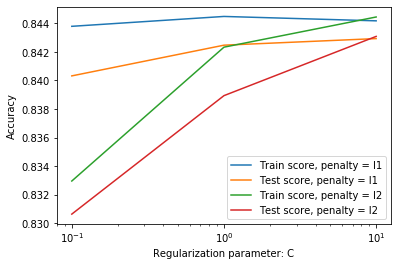

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [30]:
log1 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(log1.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(log1.score(X_test, y_test)))

Training set accuracy: 0.826
Test set accuracy: 0.820


In [31]:
log1 = LogisticRegression(C=1).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(log1.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(log1.score(X_test, y_test)))

Training set accuracy: 0.842
Test set accuracy: 0.840


C:\Users\saira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
log1 = LogisticRegression(C=10).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(log1.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(log1.score(X_test, y_test)))

Training set accuracy: 0.845
Test set accuracy: 0.843


C:\Users\saira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Question 5
Train a ``DecisionTreeClassifier`` model on this dataset. Which ``max_depth`` in  ``[1, 2, 3, 5, 10]`` is the best fit? (choose the value that both train and test scores are high and gap between train and test score is small. Set ``random_state = 0``). 

In [33]:
#Decision Tree

%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

y = data['Salary']
X = data.drop(['Salary'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0,test_size = 0.4)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.808


In [34]:
dtree = DecisionTreeClassifier(max_depth=1, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.760
Accuracy on test set: 0.758


In [35]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.827
Accuracy on test set: 0.831


In [36]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.842
Accuracy on test set: 0.846


In [37]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.854
Accuracy on test set: 0.856


In [38]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.868
Accuracy on test set: 0.854


#### Question 6
Consider the ``max_depth`` in the previous question. Which feature is the most important feature? 

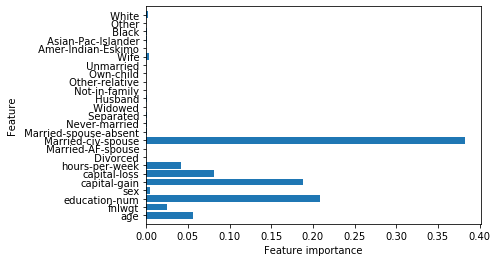

In [39]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
def feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

feature_importances(dtree)